In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

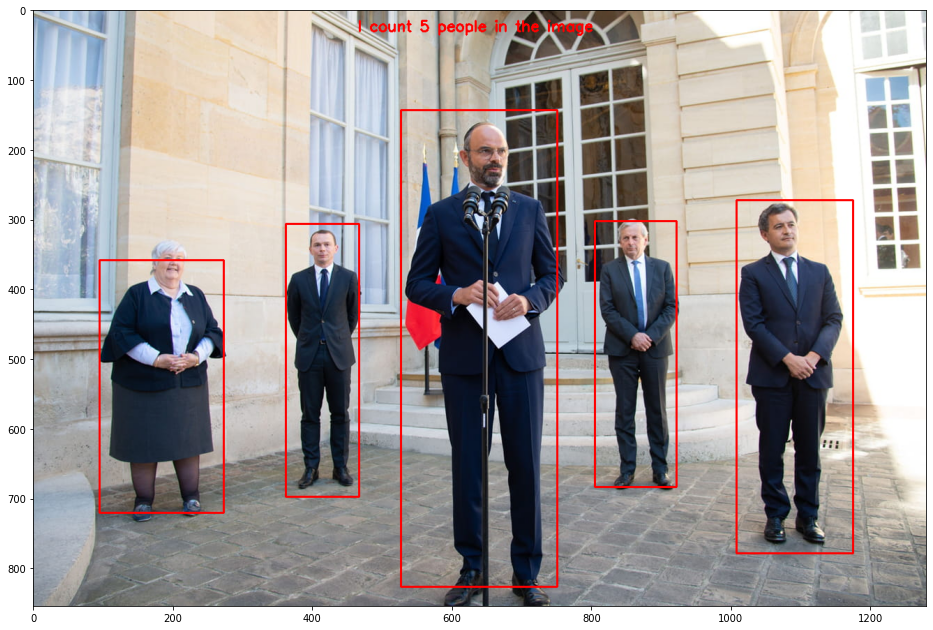

In [2]:
img_color_brg = cv.imread("people.jpg")
img_color = cv.cvtColor(img_color_brg, cv.COLOR_BGR2RGB)

confidence_threshold = 0.1

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = (255, 0, 0)

(h, w) = img_color.shape[:2]

net = cv.dnn.readNetFromCaffe('../caffe/MobileNetSSD_deploy.prototxt', '../caffe/MobileNetSSD_deploy.caffemodel')

blob = cv.dnn.blobFromImage(img_color, 0.007843, (300, 300), 127.5)

net.setInput(blob)
detections = net.forward()

count = 0
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    idx = int(detections[0, 0, i, 1])

    if confidence > confidence_threshold and CLASSES[idx] == "person":
        count += 1
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv.rectangle(img_color, (startX, startY), (endX, endY), COLORS, 2)


cv.putText(img_color, "I count " + str(count) + " people in the image", ((w // 2) - 175, 30), cv.FONT_HERSHEY_SIMPLEX, 0.7, COLORS, 2)
plt.figure(figsize=(16,16))
plt.imshow(img_color)
plt.show()